## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\CF_CAPSTONE'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data','Prepared Data','King Data Clean.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'date', 'sale_price', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'city', 'State', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,...,0,1955,0,98101,SEATTLE,WA,47.5112,-122.257,1340,5650
1,1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,...,400,1951,1991,98101,SEATTLE,WA,47.7210,-122.319,1690,7639
2,2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,...,0,1933,0,98028,KENMORE,WA,47.7379,-122.233,2720,8062
3,3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,...,910,1965,0,98101,SEATTLE,WA,47.5208,-122.393,1360,5000
4,4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,...,0,1987,0,98074,SAMMAMISH,WA,47.6168,-122.045,1800,7503
5,5,5,7237550310,5/12/2014,1225000,4,4.50,5420,101930,1.0,...,1530,2001,0,98052,REDMOND,WA,47.6561,-122.005,4760,101930
6,6,6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,...,0,1995,0,98003,FEDERAL WAY,WA,47.3097,-122.327,2238,6819
7,7,7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,...,0,1963,0,98101,SEATTLE,WA,47.4095,-122.315,1650,9711
8,8,8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,...,730,1960,0,98101,SEATTLE,WA,47.5123,-122.337,1780,8113
9,9,9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,...,0,2003,0,98038,MAPLE VALLEY,WA,47.3684,-122.031,2390,7570


In [7]:
df= df.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [8]:
df.head(20)

,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98101,SEATTLE,WA,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98101,SEATTLE,WA,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,KENMORE,WA,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98101,SEATTLE,WA,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,SAMMAMISH,WA,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1225000,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98052,REDMOND,WA,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,FEDERAL WAY,WA,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98101,SEATTLE,WA,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0,0,...,730,1960,0,98101,SEATTLE,WA,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,MAPLE VALLEY,WA,47.3684,-122.031,2390,7570


In [9]:
df.shape

(21613, 23)

##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

id               0
date             0
sale_price       0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
city             0
State            0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
## Create Total Values of Sales count
df['Total_value_of_sales'] = (df.groupby('city')['sale_price'].transform(np.sum))

In [12]:
df['Total_#_sales'] = (df.groupby('city')['sale_price'].transform(np.count_nonzero))

In [13]:
df.head()

,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15,Total_value_of_sales,Total_#_sales
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,...,0,98101,SEATTLE,WA,47.5112,-122.257,1340,5650,4802369768,8977
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,...,1991,98101,SEATTLE,WA,47.7210,-122.319,1690,7639,4802369768,8977
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,...,0,98028,KENMORE,WA,47.7379,-122.233,2720,8062,130881850,283
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,...,0,98101,SEATTLE,WA,47.5208,-122.393,1360,5000,4802369768,8977
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,...,0,98074,SAMMAMISH,WA,47.6168,-122.045,1800,7503,586169166,800


##### Duplicates check

In [14]:
dups = df.duplicated()

In [15]:
dups.shape # No dups

(21613,)

##### Extreme values checks

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

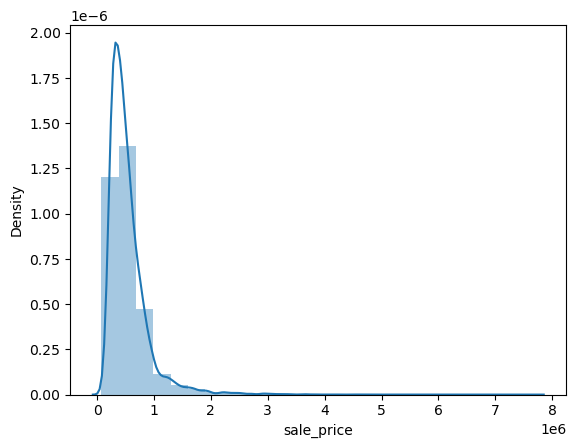

In [16]:
sns.distplot(df['sale_price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
df['sale_price'].mean() # Check the mean

540088.1417665294

In [18]:
df['sale_price'].median() # Check the median

450000.0

In [19]:
df['sale_price'].max() # Check the max

7700000

### 3. Data prep for regression analysis 

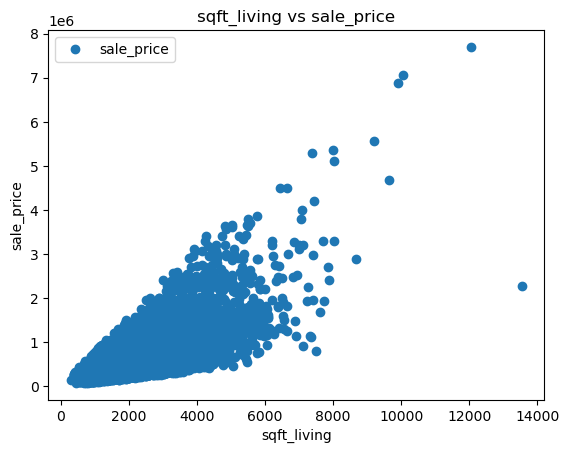

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='sale_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('sqft_living vs sale_price')  
plt.xlabel('sqft_living')  
plt.ylabel('sale_price')  
plt.show()

## State your hypothesis in a markdown cell within your Jupyter notebook.:

As sale price increases so does total squarefootage

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['sale_price'].values.reshape(-1,1)

In [22]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [23]:
y

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]], dtype=int64)

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

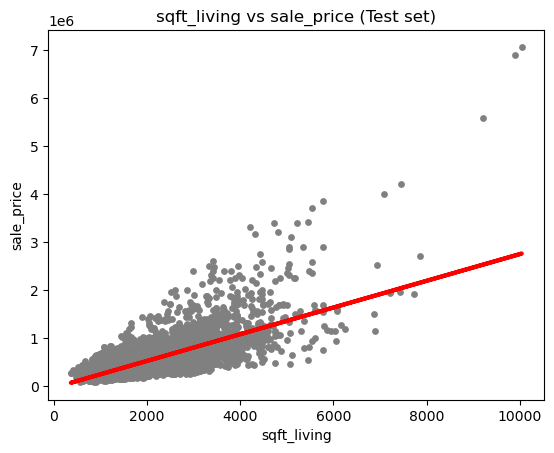

<Figure size 640x480 with 0 Axes>

In [55]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('sqft_living vs sale_price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('sale_price')
plot_test.show()
plot_test.savefig('regression_analysis.png')

## Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The line appears to fit pretty strongly until you get to mid range sized houses


In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


In [32]:
y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       ...,
       [ 560512.90534826],
       [ 374032.73903242],
       [ 329500.16200177]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000,3.601163e+05
1,1578000,1.261901e+06
2,562100,3.628996e+05
3,631500,2.766177e+05
4,780000,8.471914e+05
5,485000,4.213486e+05
6,340000,4.408316e+05
7,335606,6.685044e+05
8,425000,6.467948e+05
9,490000,1.203452e+06


##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91105
R2 score:  0.49453356717789787


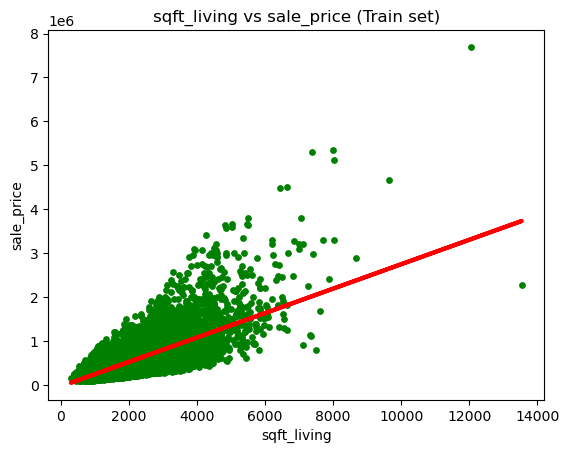

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('sqft_living vs sale_price (Train set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('sale_price')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [38]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['sale_price'] <=7700000] 

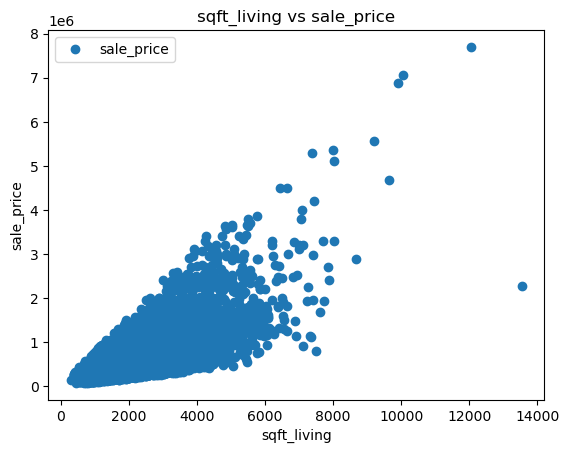

In [39]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'sqft_living', y='sale_price', style='o')  
plt.title('sqft_living vs sale_price')  
plt.xlabel('sqft_living')  
plt.ylabel('sale_price')  
plt.show()

In [40]:
# Reshape again.

X_2 = df_test['sqft_living'].values.reshape(-1,1)
y_2 = df_test['sale_price'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


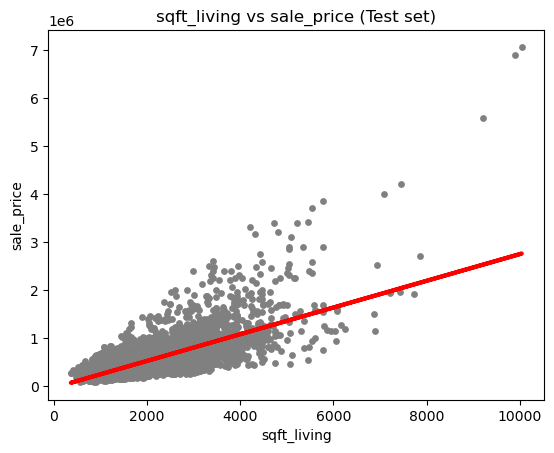

<Figure size 640x480 with 0 Axes>

In [52]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('sqft_living vs sale_price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('sale_price')
plot_test.show()


plot_test.savefig('test_set_results.png')


In [47]:
#Export Linear Regression:

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,297000,3.601163e+05
1,1578000,1.261901e+06
2,562100,3.628996e+05
3,631500,2.766177e+05
4,780000,8.471914e+05
5,485000,4.213486e+05
6,340000,4.408316e+05
7,335606,6.685044e+05
8,425000,6.467948e+05
9,490000,1.203452e+06


## Include your thoughts on how well the model performed on the test set in a markdown cell.
## Include any reflections you have on the impact of possible data bias.

## The r2 score seems to be fairly reliable, the mean squared seems to be problematic based potentially on extreme outliers. I should potentially limit either the sales or max sqft. there is a positive correlation based on the slope. Large houses and outsized sales prices may be effecting the model